In [26]:
from matplotlib import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from scipy.special import erfc
from lmfit.models import Model, LinearModel, SkewedGaussianModel, ExponentialGaussianModel

In [2]:
#filename='PL_030K.dat'
indata = np.loadtxt('PL_030K.dat', skiprows=(2), usecols=(0,1))
#print(indata)

In [3]:
x=indata[:,0]
y=indata[:,1]
#print(x)
x=(x * 10000000000 / 1240).tolist()

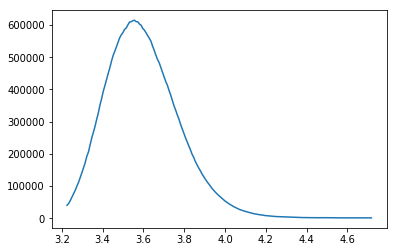

In [4]:
plot.plot(x,y)
#print(x)

In [ ]:
#fitting skewed Gaussian without background

x = np.asarray(x) #x is a list, so make sure to convert into numpy array before fitting

#peak = SkewedGaussianModel()
#background = LinearModel()
#mod = peak + background

mod = SkewedGaussianModel()
pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x, method='least_squares')

print(out.fit_report(min_correl=0.25))

plot.plot(x, y, 'b-')
plot.plot(x, out.best_fit, 'r-', label='Skewed Gaussian Model \n without background')
plot.legend(loc='best')
plot.show()

[[Model]]
    (Model(skewed_gaussian) + Model(linear))
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 41
    # data points      = 186
    # variables        = 6
    chi-square         = 1.3301e+09
    reduced chi-square = 7389547.15
    Akaike info crit   = 2947.59842
    Bayesian info crit = 2966.95290
[[Variables]]
    amplitude:  270297.462 +/- 979.084093 (0.36%) (init = 260000)
    center:     3.41792554 +/- 5.6749e-04 (0.02%) (init = 0)
    sigma:      0.24905170 +/- 7.0303e-04 (0.28%) (init = 1)
    gamma:      1.76805102 +/- 0.01333517 (0.75%) (init = 0)
    slope:      10281.6554 +/- 1327.46256 (12.91%) (init = 1)
    intercept: -44126.7687 +/- 5846.77564 (13.25%) (init = 0)
    height:     432974.730 +/- 1295.25142 (0.30%) == '0.3989423*amplitude/max(2.220446049250313e-16, sigma)'
    fwhm:       0.58647192 +/- 0.00165551 (0.28%) == '2.3548200*sigma'
[[Correlations]] (unreported correlations are < 0.250)
    C(slope, intercept)     = -0.999


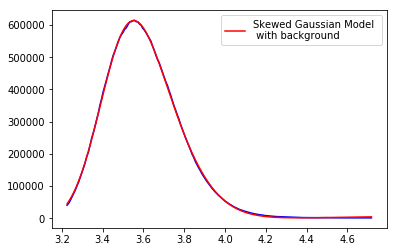

In [25]:
#fitting skewed Gaussian with background

x = np.asarray(x) #x is a list, so make sure to convert into numpy array before fitting

peak = SkewedGaussianModel()
background = LinearModel()
mod = peak + background

#pars = mod.guess(y, x=x)
out = mod.fit(y, amplitude=260000, x=x, method='least_squares')

print(out.fit_report(min_correl=0.25))

plot.plot(x, y, 'b-')
plot.plot(x, out.best_fit, 'r-', label='Skewed Gaussian Model \n with background')
#plot.plot(x, background.best_fit, 'b-', label='Background')
plot.legend(loc='best')
plot.show()

[[Model]]
    Model(expgaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 47
    # data points      = 186
    # variables        = 4
    chi-square         = 7.2631e+09
    reduced chi-square = 39907262.0
    Akaike info crit   = 3259.34117
    Bayesian info crit = 3272.24416
[[Variables]]
    sigma:      0.13817926 +/- 7.9738e-04 (0.58%) (init = 0.25)
    gamma:      7.74474565 +/- 0.10677952 (1.38%) (init = 1.8)
    amplitude:  584570.580 +/- 5097.96817 (0.87%) (init = 270000)
    center:     3.61405106 +/- 0.00456886 (0.13%) (init = 3.4)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -0.971
    C(gamma, center)     =  0.971
    C(sigma, amplitude)  = -0.934
    C(gamma, amplitude)  = -0.926
    C(sigma, center)     =  0.908
    C(sigma, gamma)      =  0.796


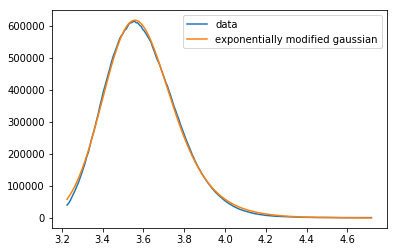

In [27]:
#Fitting exponential modified gaussian witout background

def expgaussian(x, sigma=0.25, gamma=1.8, amplitude=270000, center=3.4):
    """ an alternative exponentially modified Gaussian."""
    dx = center-x
    return amplitude* np.exp(gamma*dx) * erfc( dx/(np.sqrt(2)*sigma))


mod =  Model(expgaussian)
pars = mod.make_params(sigma=0.25, gamma=1.8, amplitude=270000, center=3.4)

out  = mod.fit(y, pars, x=x)

print(out.fit_report())

plot.plot(x, y, label='data')
plot.plot(x, out.best_fit, label='exponentially modified gaussian')
plot.legend()
plot.show()

[[Model]]
    (Model(expgaussian) + Model(linear))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 81
    # data points      = 186
    # variables        = 6
    chi-square         = 1.6900e+09
    reduced chi-square = 9389001.33
    Akaike info crit   = 2992.14030
    Bayesian info crit = 3011.49478
[[Variables]]
    sigma:      0.14438820 +/- 5.0473e-04 (0.35%) (init = 0.25)
    gamma:      7.03820784 +/- 0.05506598 (0.78%) (init = 1.8)
    amplitude:  624844.771 +/- 2706.16660 (0.43%) (init = 270000)
    center:     3.60174782 +/- 0.00230149 (0.06%) (init = 3.4)
    slope:      34656.7711 +/- 1658.30787 (4.78%) (init = 1)
    intercept: -157654.767 +/- 7407.54914 (4.70%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept)     = -0.998
    C(gamma, amplitude)     = -0.930
    C(gamma, center)        =  0.928
    C(amplitude, center)    = -0.863
    C(sigma, slope)         =  0.638
    C(sigma, intercept)     = -0.630


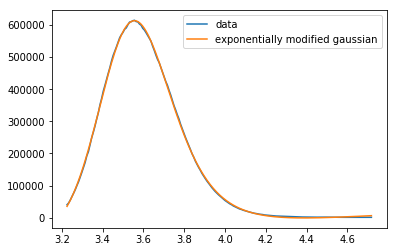

In [28]:
#Fitting exponential modified gaussian with background

def expgaussian(x, sigma=0.25, gamma=1.8, amplitude=270000, center=3.4):
    """ an alternative exponentially modified Gaussian."""
    dx = center-x
    return amplitude* np.exp(gamma*dx) * erfc( dx/(np.sqrt(2)*sigma))

peak = Model(expgaussian)
background = LinearModel()
mod = peak + background

#mod =  Model(expgaussian)
pars = mod.make_params(sigma=0.25, gamma=1.8, amplitude=270000, center=3.4)

out  = mod.fit(y, pars, x=x)

print(out.fit_report())

plot.plot(x, y, label='data')
plot.plot(x, out.best_fit, label='exponentially modified gaussian')
plot.legend()
plot.show()